<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/CV/4_Transfer_Learning/1_VisualizacionFeatures.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>

# Generalización de las Features Aprendidas por ImageNet


El impacto de ImageNet en el curso de la investigación del machine learning difícilmente puede exagerarse. El conjunto de datos se publicó originalmente en 2009 y evolucionó rápidamente hasta convertirse en ImageNet Large Scale Visual Recognition Challenge (ILSVRC). En 2012, la red neuronal profunda presentada por Alex Krizhevsky, Ilya Sutskever y Geoffrey Hinton se desempeñó un 41 % mejor que el siguiente mejor competidor, lo que demuestra que el deep learning era una estrategia viable para el machine learning y podría decirse que desencadenó la explosión en su investigación.

El éxito de ImageNet destacó que en la era del deep learning, los datos eran al menos tan importantes como los algoritmos. El conjunto de datos de ImageNet no solo permitió esa importante demostración de 2012 del poder del deep learning, sino que también permitió un avance de importancia similar en el transfer learning: los investigadores pronto se dieron cuenta de que **los pesos aprendidos en modelos de última generación para ImageNet podrían usarse para inicializar modelos para conjuntos de datos completamente diferentes** y mejorar significativamente el rendimiento. Este enfoque de "fine tuning" permitió lograr un buen desempeño con tan solo un ejemplo positivo por categoría.

Para determinar cómo sería una ImageNet para el lenguaje, primero tenemos que identificar qué hace que ImageNet sea buena para el transfer learning. Estudios previos solo han arrojado luz parcial sobre esta pregunta: reducir la cantidad de ejemplos por clase o la cantidad de clases solo da como resultado una pequeña caída en el rendimiento, mientras que las clases detalladas y más datos no siempre son mejores.

En lugar de mirar los datos directamente, es más prudente sondear lo que aprenden los modelos entrenados en los datos. Es bien sabido que las características de las redes neuronales profundas entrenadas en ImageNet **pasan de lo general a lo específico de la tarea desde la primera hasta la última capa**: las capas inferiores aprenden a modelar características de bajo nivel, como bordes, mientras que las capas superiores modelan conceptos de nivel superior, como patrones y partes u objetos completos como se puede ver en la siguiente figura.

![Imgur](https://i.imgur.com/mProuXN.png)



Es importante destacar que el conocimiento de los bordes, las estructuras y la composición visual de los objetos es relevante para muchas tareas de CV, lo que arroja luz sobre por qué estas capas son transferibles. Una propiedad clave de un conjunto de datos como ImageNet es, por lo tanto, **alentar a un modelo a aprender características que probablemente se generalizarán a nuevas tareas en el dominio del problema**.

Más allá de esto, es difícil hacer más generalizaciones sobre por qué la transferencia desde ImageNet funciona tan bien. Por ejemplo, otra posible ventaja del conjunto de datos de ImageNet es la calidad de los datos. Los creadores de ImageNet hicieron todo lo posible para garantizar anotaciones confiables y consistentes. Sin embargo, el trabajo en supervisión a distancia sirve como contrapunto, lo que indica que grandes cantidades de datos débilmente etiquetados a menudo pueden ser suficientes. De hecho, recientemente los investigadores de Facebook demostraron que podían pre-entrenar un modelo prediciendo hashtags en miles de millones de imágenes de redes sociales con precisión de última generación en ImageNet.

Sin más ideas concretas, nos quedan dos propiedades deseables clave:

* El dataset debe ser lo suficientemente **grande**, es decir, del orden de millones de ejemplos de entrenamiento.

* Debe ser **representativo del espacio de problema**s de la disciplina.

Los resultados empíricos y teóricos en el aprendizaje de múltiples tareas indican que es probable que un sesgo que se aprende en **un número suficiente de tareas** se generalice a tareas invisibles extraídas del mismo entorno. Visto a través de la lente del aprendizaje multitarea, un modelo entrenado en ImageNet aprende una gran cantidad de tareas de clasificación binaria (una para cada clase). Es probable que estas tareas, todas extraídas del espacio de imágenes naturales del mundo real, sean representativas de muchas otras tareas de CV.



# Visualización de las Features

Existe una sensación creciente de que las redes neuronales deben ser interpretables para los humanos. El campo de la interpretabilidad de redes neuronales se ha formado en respuesta a estas preocupaciones. A medida que madura, dos hilos principales de investigación han comenzado a fusionarse: la **visualización de características** y la **atribución**.

La visualización de características responde preguntas sobre qué es lo que las redes, o ciertas partes de las redes, buscan en una foto. Esto lo hacen mediante la generación de ejemplos.

![Imgur](https://i.imgur.com/zQl1yjP.png)


La atribución estudia qué parte de una imágen es responsable de que la red se active de una manera particular.

![Imgur](https://i.imgur.com/pMUeReh.png)





## Visualización mediante optimización

Las redes neuronales son, en términos generales, diferenciables con respecto a sus entradas. Si queremos averiguar qué tipo de entrada causaría un cierto comportamiento, ya sea una activación de una capa interna o el comportamiento de salida final, podemos usar derivadas para ajustar iterativamente la entrada hacia ese objetivo.

![Imgur](https://i.imgur.com/CqixZNS.png)


Independientemente de si estamos buscando la imágen dentro del dataset que mejor representa lo que espera un sector de la red o si estamos optimizando imagenes desde cero, la pregunta central que debemos hacernos para encontrar los ejemplos es qué sector de la red queremos analizar. Tenemos una gran variedad de opciones.

![Imgur](https://i.imgur.com/MXGuYpw.png)



Si queremos comprender las features individuales, podemos buscar ejemplos en los que tengan valores altos, ya sea para una neurona en una posición individual o para un canal completo.

Si queremos entender una capa como un todo, podemos usar el objetivo DeepDream, buscando imágenes que la capa encuentre “interesantes”.

Y si queremos crear ejemplos de clases de salida a partir de un clasificador, tenemos dos opciones: optimizar los logits de clase antes del softmax u optimizar las probabilidades de clase después del softmax. Uno puede ver los logits como la evidencia para cada clase y las probabilidades como la probabilidad de cada clase dada la evidencia. Desafortunadamente, la forma más fácil de aumentar la probabilidad que softmax otorga a una clase es a menudo hacer que las alternativas sean poco probables en lugar de hacer que la clase de interés sea probable. Según nuestra experiencia, la optimización de los logits previos a softmax produce imágenes de mejor calidad visual. Si bien la explicación estándar es que maximizar la probabilidad no funciona muy bien porque simplemente puede reducir la evidencia para otras clases, una hipótesis alternativa es que es más difícil de optimizar a través de la función softmax. 

### ¿Por qué visualizar por optimización?

La optimización puede darnos un ejemplo de entrada que provoque el exactamente el comportamiento deseado por la red, pero ¿por qué molestarse con eso? ¿No podríamos simplemente buscar en el conjunto de datos ejemplos que provoquen el comportamiento deseado?

Resulta que el enfoque de optimización puede ser una forma poderosa de comprender lo que realmente busca un modelo, porque separa las cosas que causan el comportamiento de las cosas que simplemente se correlacionan con las causas. Por ejemplo, considere las siguientes neuronas visualizadas con ejemplos de conjuntos de datos y optimización:
![Imgur](https://i.imgur.com/Z7uBg0G.png)

La optimización también tiene la ventaja de la flexibilidad. Por ejemplo, si queremos estudiar cómo las neuronas representan información de forma conjunta, podemos preguntarnos fácilmente cómo debería ser diferente un ejemplo en particular para que se active una neurona adicional. Esta flexibilidad también puede ser útil para visualizar cómo evolucionan las características a medida que se entrena la red. Si nos limitáramos a comprender el modelo en los ejemplos fijos en nuestro conjunto de datos, temas como estos serían mucho más difíciles de explorar.



### Implementación

In [ ]:
# @markdown Código con funciones útiles
import os
import copy
import numpy as np
from PIL import Image
import matplotlib.cm as mpl_color_map
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt

import torch
from torch.autograd import Variable
from torchvision import models


def convert_to_grayscale(im_as_arr):
    """
        Converts 3d image to grayscale
    Args:
        im_as_arr (numpy arr): RGB image with shape (D,W,H)
    returns:
        grayscale_im (numpy_arr): Grayscale image with shape (1,W,D)
    """
    grayscale_im = np.sum(np.abs(im_as_arr), axis=0)
    im_max = np.percentile(grayscale_im, 99)
    im_min = np.min(grayscale_im)
    grayscale_im = (np.clip((grayscale_im - im_min) / (im_max - im_min), 0, 1))
    grayscale_im = np.expand_dims(grayscale_im, axis=0)
    return grayscale_im


def save_gradient_images(gradient, file_name):
    """
        Exports the original gradient image
    Args:
        gradient (np arr): Numpy array of the gradient with shape (3, 224, 224)
        file_name (str): File name to be exported
    """
    if not os.path.exists('../results'):
        os.makedirs('../results')
    # Normalize
    gradient = gradient - gradient.min()
    gradient /= gradient.max()
    # Save image
    path_to_file = os.path.join('../results', file_name + '.png')
    save_image(gradient, path_to_file)


def save_class_activation_images(org_img, activation_map, file_name):
    """
        Saves cam activation map and activation map on the original image
    Args:
        org_img (PIL img): Original image
        activation_map (numpy arr): Activation map (grayscale) 0-255
        file_name (str): File name of the exported image
    """
    if not os.path.exists('../results'):
        os.makedirs('../results')
    # Grayscale activation map
    heatmap, heatmap_on_image = apply_colormap_on_image(org_img, activation_map, 'hsv')
    # Save colored heatmap
    path_to_file = os.path.join('../results', file_name+'_Cam_Heatmap.png')
    save_image(heatmap, path_to_file)
    # Save heatmap on iamge
    path_to_file = os.path.join('../results', file_name+'_Cam_On_Image.png')
    save_image(heatmap_on_image, path_to_file)
    # SAve grayscale heatmap
    path_to_file = os.path.join('../results', file_name+'_Cam_Grayscale.png')
    save_image(activation_map, path_to_file)


def apply_colormap_on_image(org_im, activation, colormap_name):
    """
        Apply heatmap on image
    Args:
        org_img (PIL img): Original image
        activation_map (numpy arr): Activation map (grayscale) 0-255
        colormap_name (str): Name of the colormap
    """
    # Get colormap
    color_map = mpl_color_map.get_cmap(colormap_name)
    no_trans_heatmap = color_map(activation)
    # Change alpha channel in colormap to make sure original image is displayed
    heatmap = copy.copy(no_trans_heatmap)
    heatmap[:, :, 3] = 0.4
    heatmap = Image.fromarray((heatmap*255).astype(np.uint8))
    no_trans_heatmap = Image.fromarray((no_trans_heatmap*255).astype(np.uint8))

    # Apply heatmap on image
    heatmap_on_image = Image.new("RGBA", org_im.size)
    heatmap_on_image = Image.alpha_composite(heatmap_on_image, org_im.convert('RGBA'))
    heatmap_on_image = Image.alpha_composite(heatmap_on_image, heatmap)
    return no_trans_heatmap, heatmap_on_image


def apply_heatmap(R, sx, sy):
    """
        Heatmap code stolen from https://git.tu-berlin.de/gmontavon/lrp-tutorial
        This is (so far) only used for LRP
    """
    b = 10*((np.abs(R)**3.0).mean()**(1.0/3))
    my_cmap = plt.cm.seismic(np.arange(plt.cm.seismic.N))
    my_cmap[:, 0:3] *= 0.85
    my_cmap = ListedColormap(my_cmap)
    plt.figure(figsize=(sx, sy))
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.axis('off')
    heatmap = plt.imshow(R, cmap=my_cmap, vmin=-b, vmax=b, interpolation='nearest')
    return heatmap
    # plt.show()


def format_np_output(np_arr):
    """
        This is a (kind of) bandaid fix to streamline saving procedure.
        It converts all the outputs to the same format which is 3xWxH
        with using sucecssive if clauses.
    Args:
        im_as_arr (Numpy array): Matrix of shape 1xWxH or WxH or 3xWxH
    """
    # Phase/Case 1: The np arr only has 2 dimensions
    # Result: Add a dimension at the beginning
    if len(np_arr.shape) == 2:
        np_arr = np.expand_dims(np_arr, axis=0)
    # Phase/Case 2: Np arr has only 1 channel (assuming first dim is channel)
    # Result: Repeat first channel and convert 1xWxH to 3xWxH
    if np_arr.shape[0] == 1:
        np_arr = np.repeat(np_arr, 3, axis=0)
    # Phase/Case 3: Np arr is of shape 3xWxH
    # Result: Convert it to WxHx3 in order to make it saveable by PIL
    if np_arr.shape[0] == 3:
        np_arr = np_arr.transpose(1, 2, 0)
    # Phase/Case 4: NP arr is normalized between 0-1
    # Result: Multiply with 255 and change type to make it saveable by PIL
    if np.max(np_arr) <= 1:
        np_arr = (np_arr*255).astype(np.uint8)
    return np_arr


def save_image(im, path):
    """
        Saves a numpy matrix or PIL image as an image
    Args:
        im_as_arr (Numpy array): Matrix of shape DxWxH
        path (str): Path to the image
    """
    if isinstance(im, (np.ndarray, np.generic)):
        im = format_np_output(im)
        im = Image.fromarray(im)
    im.save(path)


def preprocess_image(pil_im, resize_im=True):
    """
        Processes image for CNNs
    Args:
        PIL_img (PIL_img): PIL Image or numpy array to process
        resize_im (bool): Resize to 224 or not
    returns:
        im_as_var (torch variable): Variable that contains processed float tensor
    """
    # Mean and std list for channels (Imagenet)
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]

    # Ensure or transform incoming image to PIL image
    if type(pil_im) != Image.Image:
        try:
            pil_im = Image.fromarray(pil_im)
        except Exception as e:
            print("could not transform PIL_img to a PIL Image object. Please check input.")

    # Resize image
    if resize_im:
        pil_im = pil_im.resize((224, 224), Image.ANTIALIAS)

    im_as_arr = np.float32(pil_im)
    im_as_arr = im_as_arr.transpose(2, 0, 1)  # Convert array to D,W,H
    # Normalize the channels
    for channel, _ in enumerate(im_as_arr):
        im_as_arr[channel] /= 255
        im_as_arr[channel] -= mean[channel]
        im_as_arr[channel] /= std[channel]
    # Convert to float tensor
    im_as_ten = torch.from_numpy(im_as_arr).float()
    # Add one more channel to the beginning. Tensor shape = 1,3,224,224
    im_as_ten.unsqueeze_(0)
    # Convert to Pytorch variable
    im_as_var = Variable(im_as_ten, requires_grad=True)
    return im_as_var


def recreate_image(im_as_var):
    """
        Recreates images from a torch variable, sort of reverse preprocessing
    Args:
        im_as_var (torch variable): Image to recreate
    returns:
        recreated_im (numpy arr): Recreated image in array
    """
    reverse_mean = [-0.485, -0.456, -0.406]
    reverse_std = [1/0.229, 1/0.224, 1/0.225]
    recreated_im = copy.copy(im_as_var.data.numpy()[0])
    for c in range(3):
        recreated_im[c] /= reverse_std[c]
        recreated_im[c] -= reverse_mean[c]
    recreated_im[recreated_im > 1] = 1
    recreated_im[recreated_im < 0] = 0
    recreated_im = np.round(recreated_im * 255)

    recreated_im = np.uint8(recreated_im).transpose(1, 2, 0)
    return recreated_im


def get_positive_negative_saliency(gradient):
    """
        Generates positive and negative saliency maps based on the gradient
    Args:
        gradient (numpy arr): Gradient of the operation to visualize
    returns:
        pos_saliency ( )
    """
    pos_saliency = (np.maximum(0, gradient) / gradient.max())
    neg_saliency = (np.maximum(0, -gradient) / -gradient.min())
    return pos_saliency, neg_saliency


def get_example_params(example_index):
    """
        Gets used variables for almost all visualizations, like the image, model etc.
    Args:
        example_index (int): Image id to use from examples
    returns:
        original_image (numpy arr): Original image read from the file
        prep_img (numpy_arr): Processed image
        target_class (int): Target class for the image
        file_name_to_export (string): File name to export the visualizations
        pretrained_model(Pytorch model): Model to use for the operations
    """
    # Pick one of the examples
    example_list = (('../input_images/snake.png', 56),
                    ('../input_images/cat_dog.png', 243),
                    ('../input_images/spider.png', 72))
    img_path = example_list[example_index][0]
    target_class = example_list[example_index][1]
    file_name_to_export = img_path[img_path.rfind('/')+1:img_path.rfind('.')]
    # Read image
    original_image = Image.open(img_path).convert('RGB')
    # Process image
    prep_img = preprocess_image(original_image)
    # Define model
    pretrained_model = models.alexnet(pretrained=True)
    return (original_image,
            prep_img,
            target_class,
            file_name_to_export,
            pretrained_model)

In [ ]:
import os
import numpy as np

import torch
from torch.optim import Adam
from torchvision import models


class CNNLayerVisualization():
    """
        Produces an image that minimizes the loss of a convolution
        operation for a specific layer and filter
    """
    def __init__(self, model, selected_layer, selected_filter):
        self.model = model
        self.model.eval()
        self.selected_layer = selected_layer
        self.selected_filter = selected_filter
        self.conv_output = 0
        # Create the folder to export images if not exists
        if not os.path.exists('generated'):
            os.makedirs('generated')

    def visualise_layer(self):
        # Process image and return variable
        # Generate a random image
        random_image = np.uint8(np.random.uniform(150, 180, (224, 224, 3)))
        # Process image and return variable
        processed_image = preprocess_image(random_image, False)
        # Define optimizer for the image
        optimizer = Adam([processed_image], lr=0.1, weight_decay=1e-6)
        for i in range(1, 31):
            optimizer.zero_grad()
            # Assign create image to a variable to move forward in the model
            x = processed_image
            for index, layer in enumerate(self.model):
                # Forward pass layer by layer
                x = layer(x)
                if index == self.selected_layer:
                    # Only need to forward until the selected layer is reached
                    # Now, x is the output of the selected layer
                    break
            # Here, we get the specific filter from the output of the convolution operation
            # x is a tensor of shape 1x512x28x28.(For layer 17)
            # So there are 512 unique filter outputs
            # Following line selects a filter from 512 filters so self.conv_output will become
            # a tensor of shape 28x28
            self.conv_output = x[0, self.selected_filter]
            # Loss function is the mean of the output of the selected layer/filter
            # We try to minimize the mean of the output of that specific filter
            loss = -torch.mean(self.conv_output)
            print('Iteration:', str(i), 'Loss:', "{0:.2f}".format(loss.data.numpy()))
            # Backward
            loss.backward()
            # Update image
            optimizer.step()
            # Recreate image
            self.created_image = recreate_image(processed_image)
            # Save image
            if i % 5 == 0:
                im_path = 'generated/layer_vis_l' + str(self.selected_layer) + \
                    '_f' + str(self.selected_filter) + '_iter' + str(i) + '.jpg'
                save_image(self.created_image, im_path)





In [ ]:
cnn_layer = 2
filter_pos = 5
# Fully connected layer is not needed
pretrained_model = models.vgg16(pretrained=True).features
layer_vis = CNNLayerVisualization(pretrained_model, cnn_layer, filter_pos)
layer_vis.visualise_layer()

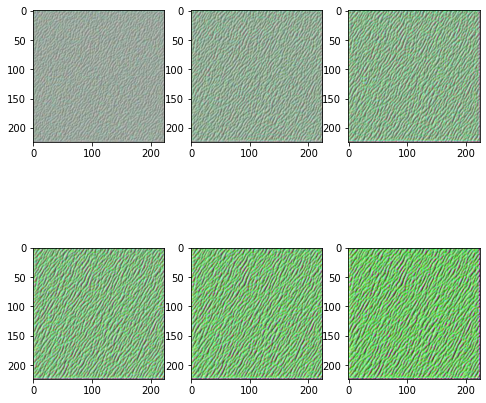

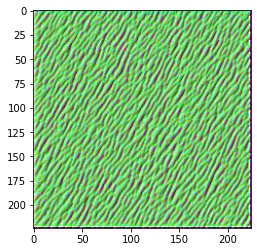

In [ ]:
# @markdown Código para mostrar imágenes
img_list = [plt.imread("generated/layer_vis_l"+str(cnn_layer)+"_f"+str(filter_pos)+"_iter5.jpg"),
plt.imread("generated/layer_vis_l"+str(cnn_layer)+"_f"+str(filter_pos)+"_iter10.jpg"),
plt.imread("generated/layer_vis_l"+str(cnn_layer)+"_f"+str(filter_pos)+"_iter15.jpg"),
plt.imread("generated/layer_vis_l"+str(cnn_layer)+"_f"+str(filter_pos)+"_iter20.jpg"),
plt.imread("generated/layer_vis_l"+str(cnn_layer)+"_f"+str(filter_pos)+"_iter25.jpg"),
plt.imread("generated/layer_vis_l"+str(cnn_layer)+"_f"+str(filter_pos)+"_iter30.jpg")]


w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    img = img_list[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

plt.imshow(img_list[5])
plt.show()

In [ ]:
cnn_layer = 17
filter_pos = 5
layer_vis = CNNLayerVisualization(pretrained_model, cnn_layer, filter_pos)
layer_vis.visualise_layer()

Iteration: 1 Loss: 1.21
Iteration: 2 Loss: -2.30
Iteration: 3 Loss: -9.05
Iteration: 4 Loss: -16.16
Iteration: 5 Loss: -22.84
Iteration: 6 Loss: -29.14
Iteration: 7 Loss: -35.05
Iteration: 8 Loss: -40.78
Iteration: 9 Loss: -46.31
Iteration: 10 Loss: -51.67
Iteration: 11 Loss: -56.93
Iteration: 12 Loss: -62.18
Iteration: 13 Loss: -67.36
Iteration: 14 Loss: -72.47
Iteration: 15 Loss: -77.49
Iteration: 16 Loss: -82.50
Iteration: 17 Loss: -87.47
Iteration: 18 Loss: -92.43
Iteration: 19 Loss: -97.38
Iteration: 20 Loss: -102.30
Iteration: 21 Loss: -107.23
Iteration: 22 Loss: -112.17
Iteration: 23 Loss: -117.08
Iteration: 24 Loss: -122.00
Iteration: 25 Loss: -126.95
Iteration: 26 Loss: -131.92
Iteration: 27 Loss: -136.91
Iteration: 28 Loss: -141.90
Iteration: 29 Loss: -146.91
Iteration: 30 Loss: -151.95


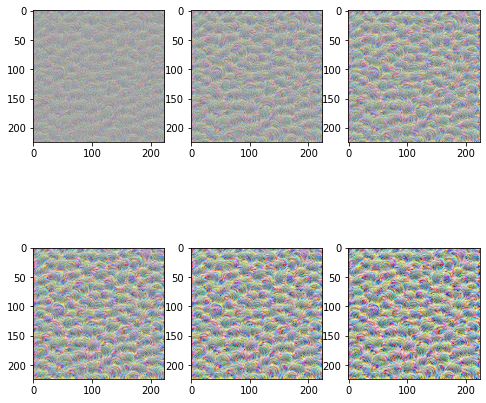

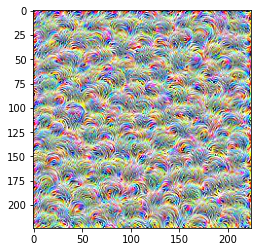

In [ ]:
# @markdown Código para mostrar imágenes
img_list = [plt.imread("generated/layer_vis_l"+str(cnn_layer)+"_f"+str(filter_pos)+"_iter5.jpg"),
plt.imread("generated/layer_vis_l"+str(cnn_layer)+"_f"+str(filter_pos)+"_iter10.jpg"),
plt.imread("generated/layer_vis_l"+str(cnn_layer)+"_f"+str(filter_pos)+"_iter15.jpg"),
plt.imread("generated/layer_vis_l"+str(cnn_layer)+"_f"+str(filter_pos)+"_iter20.jpg"),
plt.imread("generated/layer_vis_l"+str(cnn_layer)+"_f"+str(filter_pos)+"_iter25.jpg"),
plt.imread("generated/layer_vis_l"+str(cnn_layer)+"_f"+str(filter_pos)+"_iter30.jpg")]


w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    img = img_list[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

plt.imshow(img_list[5])
plt.show()

## Microscope de OpenAI

[Microscope](https://openai.com/blog/microscope/) es un sitio web que contiene una colección de visualizaciones de cada capa y neurona significativa de ocho "organismos modelo" de visión que a menudo se estudian en interpretabilidad. Microscope facilita el análisis de las features que se forman dentro de estas redes neuronales, con el objetivo de ayudar a la comunidad investigadora a avanzar hacia la comprensión de estos complicados sistemas.